# Reconnaissance faciale

In [1]:
import cv2
from PIL import Image
import face_recognition

/var/www/html/cours/brief17-appli_chat/venv_facial_rec/lib/python3.12/site-packages/face_recognition_models/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [3]:
try: 
    visage_connu = face_recognition.load_image_file(f"image/emma_1.jpg")
    visage_a_reconnaitre = face_recognition.load_image_file(f"image/emma_2.jpg")
except FileNotFoundError as e:
    print(f"Erreur : {e}. Veuillez vérifier que les fichiers existent et que les chemins sont corrects.")
    visage_connu = None
    visage_a_reconnaitre = None

print("visage connu:", visage_connu)
print("taille visage connu:", visage_connu.shape if visage_connu is not None else "N/A")

visage connu: [[[220 221 223]
  [220 221 223]
  [220 221 223]
  ...
  [207 208 210]
  [207 208 210]
  [207 208 210]]

 [[220 221 223]
  [220 221 223]
  [220 221 223]
  ...
  [207 208 210]
  [207 208 210]
  [207 208 210]]

 [[220 221 223]
  [220 221 223]
  [220 221 223]
  ...
  [207 208 210]
  [207 208 210]
  [207 208 210]]

 ...

 [[ 41  40  46]
  [ 40  39  45]
  [ 39  38  44]
  ...
  [ 27  25  28]
  [ 26  24  27]
  [ 25  23  26]]

 [[ 41  40  46]
  [ 41  40  46]
  [ 40  39  45]
  ...
  [ 27  25  28]
  [ 27  25  28]
  [ 26  24  27]]

 [[ 42  41  47]
  [ 41  40  46]
  [ 40  39  45]
  ...
  [ 28  26  29]
  [ 27  25  28]
  [ 26  24  27]]]
taille visage connu: (1102, 735, 3)


## Version simple
Comparaison avec face_recognition

In [14]:
try:
    encodage_visage_connu = face_recognition.face_encodings(visage_connu)[0]
    encodage_visage_a_reconnaitre = face_recognition.face_encodings(visage_a_reconnaitre)[0]
except IndexError:
    print("Aucun visage détecté dans l'une des images.")
    encodage_visage_connu = None
    encodage_visage_a_reconnaitre = None

if encodage_visage_connu is not None and encodage_visage_a_reconnaitre is not None:
    resultats = face_recognition.compare_faces([encodage_visage_connu], encodage_visage_a_reconnaitre, tolerance=0.6)
    # La 'tolerance' (tolérance) est un seuil de distance. Plus elle est faible, plus la correspondance doit être précise.

print(f"La comparaison a donné le résultat : {resultats[0]}")

if resultats[0]:
    print("Le visage a été reconnu avec succès ! C'est la même personne.")
else:
    print("Le visage n'a pas été reconnu. Ce n'est pas la même personne.")

La comparaison a donné le résultat : True
Le visage a été reconnu avec succès ! C'est la même personne.


## Version plus compliquée
Avec crop OpenCV

✅ Encodages des visages créés avec succès.

🎉 Résultat : VRAI. Les visages correspondent ! C'est la même personne.


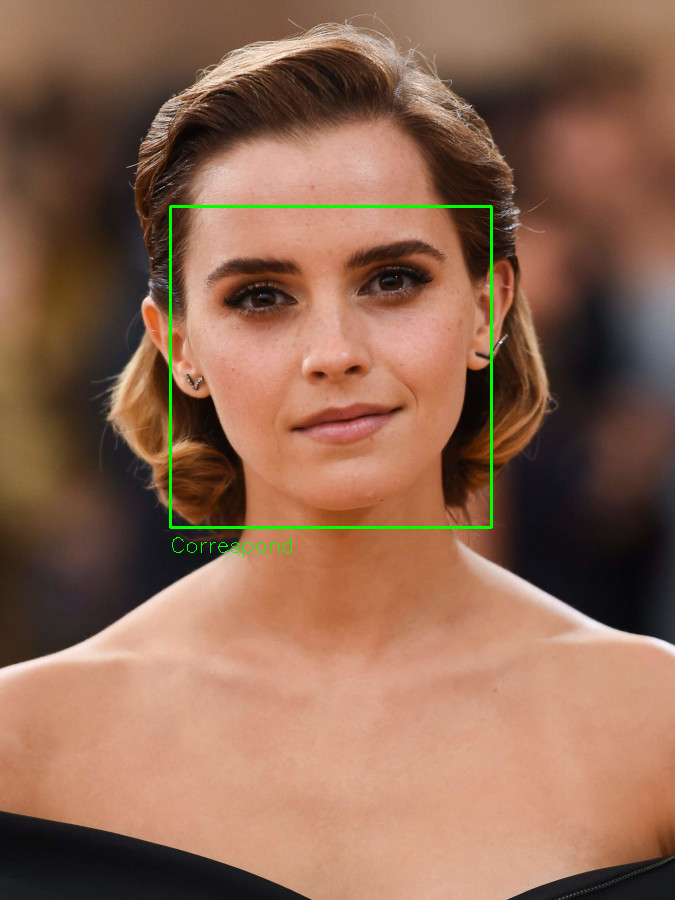

In [15]:
if visage_connu is not None and visage_a_reconnaitre is not None:
    try:
        encodage_visage_connu = face_recognition.face_encodings(visage_connu)[0]
        encodage_visage_a_reconnaitre = face_recognition.face_encodings(visage_a_reconnaitre)[0]

        print("✅ Encodages des visages créés avec succès.")
        resultats = face_recognition.compare_faces([encodage_visage_connu], encodage_visage_a_reconnaitre, tolerance=0.6)
        
        if resultats[0]:
            print("\n🎉 Résultat : VRAI. Les visages correspondent ! C'est la même personne.")
        else:
            print("\n❌ Résultat : FAUX. Les visages ne correspondent pas.")

        # Afficher visuellement le résultat
        # Convertir l'image au format BGR (Blue, Green, Red - format par défaut de la bibliothèque OpenCV)
        visage_a_reconnaitre_bgr = cv2.cvtColor(visage_a_reconnaitre, cv2.COLOR_RGB2BGR)   

        #  Dessiner une bounding box autour du visage détecté   
        locations = face = face_recognition.face_locations(visage_a_reconnaitre)
        if locations:
            top, right, bottom, left = locations[0]
            couleur = (0, 255, 0) if resultats[0] else (0, 0, 255) # Vert si match, Rouge sinon
            cv2.rectangle(visage_a_reconnaitre_bgr, (left, top), (right, bottom), couleur, 2)
            texte = "Correspond" if resultats[0] else "No Match"
            cv2.putText(visage_a_reconnaitre_bgr, texte, (left, bottom + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, couleur, 1)

        # Afficher l'image dans une fenêtre
        image_pil = Image.fromarray(cv2.cvtColor(visage_a_reconnaitre_bgr, cv2.COLOR_BGR2RGB))
        display(image_pil)

    except IndexError:
        print("\n⚠️ Erreur : Aucun visage n'a été détecté dans l'une des images. Vérifiez les fichiers.")


## Intégration de la caméra

In [ ]:
try:
    encodage_connu = face_recognition.face_encodings(visage_connu)[0]
except IndexError:
    print("Erreur : aucun visage détecté dans l'image de référence.")
    exit()

# Créer un tableau pour stocker les encodages connus et leurs noms
encodages_connus = [encodage_connu]
noms_connus = ["Nom de la personne"]

cap = cv2.VideoCapture(0)  # Utiliser la caméra par défaut (0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur lors de la capture de la vidéo.")
        break

        # Redimensionner le cadre pour une performance plus rapide
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    
    # Convertir de BGR en RGB
    frame_rgb = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

    # Détecter les visages dans le flux vidéo
    face_locations = face_recognition.face_locations(frame_rgb)
    face_encodings = face_recognition.face_encodings(frame_rgb, face_locations)

    for (top, right, bottom, left), encodage_visage in zip(face_locations, face_encodings):
        nom = "Inconnu"
        couleur = (0, 0, 255) # Rouge par défaut

        # Comparer le visage de la caméra avec les encodages connus
        correspondances = face_recognition.compare_faces(encodages_connus, encodage_visage)

        if True in correspondances:
            index_correspondance = correspondances.index(True)
            nom = noms_connus[index_correspondance]
            couleur = (0, 255, 0) # Vert si reconnu

        # Dessiner le rectangle et le nom sur l'image
        cv2.rectangle(frame, (left, top), (right, bottom), couleur, 2)
        cv2.putText(frame, nom, (left, bottom + 25), cv2.FONT_HERSHEY_DUPLEX, 0.7, couleur, 1)

    # Afficher le flux vidéo
    cv2.imshow('Reconnaissance faciale en direct', frame)
    
    # Sortir de la boucle si la touche 'q' est pressée
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la caméra et fermer toutes les fenêtres
cap.release()
cv2.destroyAllWindows()

Erreur lors de la capture de la vidéo.


[ WARN:0@2695.650] global cap_v4l.cpp:914 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@2695.650] global obsensor_uvc_stream_channel.cpp:163 getStreamChannelGroup Camera index out of range


### L'intégration de la caméra ne fonctionne pas sous wsl - problèmes de permissions, à voir dans la véritable appli

### 1- Sélection de la technologie

Pour répondre aux contraintes du client (pas d'API tierce, code Python, Docker), la solution la plus pertinente est l'utilisation des bibliothèques dlib et face_recognition, complétées par OpenCV pour la gestion de la caméra et des images, et par un framework web comme Flask ou FastAPI pour l'API.

### 2 - Quelles en sont les fonctionnalités

- Détection faciale : Localise les visages dans une image ou un flux vidéo et renvoie leurs coordonnées.
- Extraction de caractéristiques : Convertit un visage en un vecteur de 128 dimensions (un "face embedding") qui représente ses caractéristiques uniques.
- Vérification (1:1) : Compare deux encodages faciaux pour déterminer s'ils appartiennent à la même personne. C'est la base de l'authentification.
- Identification (1:N) : Compare un encodage à un ensemble d'encodages déjà enregistrés pour trouver une correspondance.
- Détection des points de repère faciaux (landmarks) : Identifie des points clés sur le visage (yeux, nez, bouche) pour l'alignement.

### 3 - Les entrées et les sorties

- Entrées : L'API recevra des données d'image. Pour l'authentification en direct, l'entrée sera un flux vidéo ou une image capturée par une webcam. Dans le cadre d'une API web, cela pourrait être une image encodée en base64.

- Sorties : La sortie de l'API sera une réponse JSON. Elle contiendra généralement un statut (succès/échec) et des informations sur la reconnaissance. Pour une vérification simple, la sortie peut être un booléen (true/false). Pour une identification, la sortie serait l'identité de la personne reconnue ou null si aucune correspondance n'est trouvée.<br/>
Exemple de sortie pour la vérification : {"status": "success", "match": true}<br/>
Exemple de sortie pour l'identification : {"status": "success", "user_id": "123", "confidence": 0.85}

### 3. Cette technologie est-elle suffisante seule pour remplir le cahier des charges ?
Non, elle n'est pas suffisante seule. Bien que le cœur de la reconnaissance faciale soit couvert par dlib et face_recognition, le cahier des charges impose de rendre le service disponible via une API et de l'intégrer dans une application Docker.

La technologie choisie doit être intégrée dans un écosystème qui inclut :
- Un framework web (Flask/FastAPI) pour créer l'API REST.
- Docker pour conteneuriser l'application, ce qui permet de l'exécuter de manière cohérente sur les serveurs du client. Le Dockerfile devra inclure toutes les dépendances nécessaires (cmake, dlib, OpenCV, etc.).
- Une base de données pour stocker les encodages faciaux des utilisateurs. Un simple dictionnaire peut faire l'affaire pour un prototype, mais une base de données SQL (PostgreSQL) serait nécessaire pour un système en production.
- Un mécanisme de détection de la vie (liveness detection) pour empêcher les tentatives d'usurpation d'identité avec des photos ou des vidéos. Ce n'est pas une fonctionnalité standard de face_recognition et nécessite une implémentation supplémentaire.